In [19]:
# This line loads into iPython the libraries needed to generate 
# graphics in-line
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Using python packages
Python code is organized in units called "packages". The central repository of public packages
is [pypi](https://pypi.python.org/)

Using a python library requires two steps:

1. Installing the packages (and their dependencies)
2. Importing the packages into the program

## installing packages
We use two package managers: pip and conda. Here we demonstrate the use pip. Conda is similar.

In [ ]:
#get help on the pip command
!pip -h

In [ ]:
# List the installed packages
!pip list

In [1]:
# Show information regarding a specific package
!pip show -v excel

In [2]:
# Install a package
!pip install excel

  Running setup.py bdist_wheel for excel ... - \ done
  Stored in directory: /Users/yoavfreund/Library/Caches/pip/wheels/4b/b6/1e/ebef7d7af6d3fa9c81e10a758d7b056cd4f06846109e2027d8
Successfully built excel


In [ ]:
# upgrade the package
!pip install --upgrade boto

**Note:** You would usually run the installation in a shell, rather than in iPython. This is for various reasons, one of which is that you often need root permission to install a package, which means that you need to use the command `sudo` in front of pip. i.e.

  `sudo pip install --upgrade boto`

Doing so requires entering a password, which is hard to do inside a notebook, and is not recommended because it leaves
a trace of the password in an open file.

## Importing packages

We review the different ways to load a package. 

Note that we have already loaded pylab using the magic `%pylab inline`
so that for this notebook, these operations are unnecessary.

In [14]:
import pylab

To get the documentation about a package, put `"?"` after it

In [15]:
pylab?

A package is a collection of objects (variables, classes, methods).

To get a list of the objects defined in pylab, type `tab` after the `"."`

In [ ]:
pylab.

To get information about a particular method, put a question mark `"?"` after the full name of the method

In [16]:
pylab.plot?

In [17]:
# to import pylab but use a shorter name
import pylab as pl

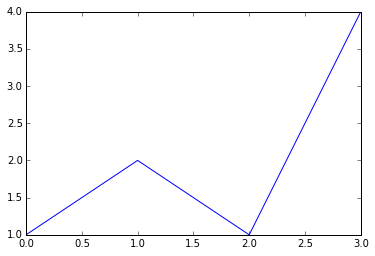

In [20]:
 pl.plot([1,2,1,4])

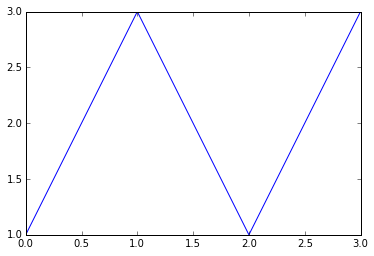

In [21]:
# you can also import specific object directly into the current namespace
from pylab import plot
plot([1,3,1,3])

In [ ]:
# you can even import all objects into the current name space, 
# but beware of name colissions!
from pylab import *

## Auto Reload
Suppose you imported a package and then, at a later point, the package changed (for example, you used pip to install a new version of the package). Rerunning the `import` command in your notebook will not reload the package. The only way to load the updated module into the notebook is to restart the kernel, thereby losing all variables that have been computed so far.

If you want your packages to get reloaded automatically before each cell is executed, use the following ipython extension:

In [ ]:
%load_ext autoreload
%autoreload 2

# Data Input and Output

In [22]:
%cd ../data/ThinkStatsData/
!ls -l

/Users/yoavfreund/academic.papers/Courses/DSE200/DSE200-notebooks/data/ThinkStatsData
total 115880
-rw-r--r--  1 yoavfreund  staff   6089664 Oct 13 21:05 2002FemPreg.dat
-rw-r--r--  1 yoavfreund  staff  37664704 Oct 13 21:05 2002FemResp.dat
-rw-r--r--  1 yoavfreund  staff  14719936 Oct 13 21:05 2002Male.dat
-rw-r--r--  1 yoavfreund  staff       100 Oct 13 21:05 binaryFile
-rw-r--r--  1 yoavfreund  staff       178 Oct 13 21:05 json.jsn
-rw-r--r--  1 yoavfreund  staff       243 Oct 13 21:05 json.pkl
-rw-r--r--  1 yoavfreund  staff    320426 Oct 13 21:05 pickle.pkl
-rw-r--r--  1 yoavfreund  staff    320426 Oct 13 21:05 pickle0.pkl
-rw-r--r--  1 yoavfreund  staff     80335 Oct 13 21:05 pickle1.pkl
-rw-r--r--  1 yoavfreund  staff     80329 Oct 13 21:05 pickle2.pkl
-rw-r--r--  1 yoavfreund  staff       686 Oct 13 21:05 picklez0.pkl
-rw-r--r--  1 yoavfreund  staff       432 Oct 13 21:05 picklez1.pkl
-rw-r--r--  1 yoavfreund  staff       430 Oct 13 21:05 picklez2.pkl
-rw-r--r--  1 yoavfreund  

In [23]:
!head survey.pl

"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

import sys
import gzip
import os


In [24]:
!cp survey.pl survey.tmp
#To read or write to a file we need a file handle
handle=open('survey.tmp','r+w')

In [25]:
# 'r+w' means that the file is opened for both reading and writing. 
# For more information we check the documentation for "open"
open?

In [ ]:
# Which leads us to documentation for "file"
file?

In [26]:
# read the file line by line and output the lines that contain the string 'class'

i=0        # counts the detected lines
for line in handle.readlines():
    if 'class' in line:
        print i,line,   # comma at the end because the line already contains <cr> at it's end.
        i+=1
handle.close()

0 class Record(object):
1 class Respondent(Record): 
2 class Pregnancy(Record):
3 class Table(object):
4         """Child classes can override this to recode values."""
5 class Respondents(Table):
6 class Pregnancies(Table):


In [27]:
# read the file line by line and output the lines 
# that contain the string 'class'
# and store the location of the beginning of such lines
handle=open('survey.tmp','r+w')

table=[]   # the locations of the start of the detected lines in the file
i=0        # counts the detected lines
c=0        # counts all the lines
line='start'
while line != '':
    loc=handle.tell()
    line=handle.readline()
    if 'class' in line:
        print i,line,   # comma at the end because the line already contains <cr> at it's end.
        table.append((i,loc))
        i=i+1
handle.close()
print table

0 class Record(object):
1 class Respondent(Record): 
2 class Pregnancy(Record):
3 class Table(object):
4         """Child classes can override this to recode values."""
5 class Respondents(Table):
6 class Pregnancies(Table):
[(0, 235), (1, 289), (2, 352), (3, 412), (4, 2614), (5, 2693), (6, 3449)]


In [28]:
#we can jump from place to place in the file
from string import strip
handle=open('survey.tmp','r+w')
for (i,loc) in table:
    handle.seek(loc)
    line=handle.readline()
    print i,line,

    #alter the line and write it back in.
    line=line[:7]+'***'+line[10:]
    handle.seek(loc)
    handle.write(line)

handle.close()

0 class Record(object):
1 class Respondent(Record): 
2 class Pregnancy(Record):
3 class Table(object):
4         """Child classes can override this to recode values."""
5 class Respondents(Table):
6 class Pregnancies(Table):


In [29]:
!cat survey.tmp

"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

import sys
import gzip
import os

class R***rd(object):
    """Represents a record."""

class R***ondent(Record): 
    """Represents a respondent."""

class P***nancy(Record):
    """Represents a pregnancy."""

class T***e(object):
    """Represents a table as a list of objects"""

    def __init__(self):
        self.records = []
        
    def __len__(self):
        return len(self.records)

    def ReadFile(self, data_dir, filename, fields, constructor, n=None):
        """Reads a compressed data file builds one object per record.

        Args:
            data_dir: string directory name
            filename: string name of the file to read

            fields: sequence of (name, start, end, case) tuples specifying 
            the fields to extract

            constructor: what ki

### Random access vs. sequential access
One can access file contents randomly, but there is a large penalty in terms of latency and latency variability.
We will look into this later today.

# File formats
The files we dealt with so far are plain text files. This is the format that is most portable, because you can always open
a text file in a text editor or look at some lines using `head` or `tail`

However, there are some important down sides to using text files:

1. **Space inefficiency:** the number 12345678901234567890 requires 20 bytes of disk space to store in ascii, but only  8 bytes to store in binary format. Moreover, structured data such as digitized sound can be compressed by large factors with negligible error.
1. **Self description vs. external description:** When we store data using ascii, we need to write two programs - an encoding program and a decoding program. This is a lot of additional work. By using **self-describing** data structures we can avoid this work altogether.

In [30]:
#the calculation of the number of bytes required 
from math import log
(log(12345678901234567890)/log(2))/8

7.927579997095717

## Binary file formats
Binary files are written using the command `write` and read using the command `read`. Binary files lack the concept of **lines**, they only have positions. 

In [31]:
file=open('binaryFile','wb')
buffer=bytearray(range(100,200))
file.write(buffer)
file.close()

In [32]:
# printing the content of a binary file as text does not make much sense
!head binaryFile

defghijklmnopqrstuvwxyz{|}~������������������������������������������������������������������������

In [33]:
file=open('binaryFile','rb')
buffer2=bytearray(file.read())
print type(buffer2)
S=','.join([str(i) for i in buffer2])
print S
print 'length as csv',len(S)
file.close()
print 'length of binary file=100 byte'
!ls -l binaryFile

<type 'bytearray'>
100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
length as csv 399
length of binary file=100 byte
-rw-r--r--  1 yoavfreund  staff  100 Oct 14 10:43 binaryFile


## Self describing files
We will cover two types of self-describing files:

* The first are `pickle` files. This format is popular within the python environment and can store any python data structure. The encoded file is typically readable, but that is not the main feature.  
* The second are `json`. This format came out of `javascript` and is used extensively over the web as a way to communicate complex data structure. It is a format that emphasizes readability and interoperability. It is now the de-facto standard for internet communication between programs.

In [34]:
# Lets define a complex data structure
A={'first name':'Yoav',
   'last name':'Freund',
   'speaks':('English','Hebrew'),
   'Research':{'Probability':7,
               'bio-informatics':3,
               'Data Science':2.1
               },
   'longList':numpy.zeros(10000)
   }
A

{'Research': {'Data Science': 2.1, 'Probability': 7, 'bio-informatics': 3},
 'first name': 'Yoav',
 'last name': 'Freund',
 'longList': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'speaks': ('English', 'Hebrew')}

In [35]:
# Lets store this data in a Pickle file
import pickle
pickle.dump(A,open('pickle.pkl','w'))
!ls -l pickle*

-rw-r--r--  1 yoavfreund  staff  320426 Oct 14 11:04 pickle.pkl
-rw-r--r--  1 yoavfreund  staff  320426 Oct 13 21:05 pickle0.pkl
-rw-r--r--  1 yoavfreund  staff   80335 Oct 13 21:05 pickle1.pkl
-rw-r--r--  1 yoavfreund  staff   80329 Oct 13 21:05 pickle2.pkl
-rw-r--r--  1 yoavfreund  staff     686 Oct 13 21:05 picklez0.pkl
-rw-r--r--  1 yoavfreund  staff     432 Oct 13 21:05 picklez1.pkl
-rw-r--r--  1 yoavfreund  staff     430 Oct 13 21:05 picklez2.pkl


### There are currently 3 different protocols which can be used for pickling.

* Protocol version 0 is the original ASCII protocol and is backwards compatible with earlier versions of Python.
* Protocol version 1 is the old binary format which is also compatible with earlier versions of Python.
* Protocol version 2 was introduced in Python 2.3. It provides much more efficient pickling of new-style classes.


In [36]:
pickle.dump(A,open('pickle0.pkl','wb'),protocol=0)
pickle.dump(A,open('pickle1.pkl','wb'),protocol=1)
pickle.dump(A,open('pickle2.pkl','wb'),protocol=2)
!ls -l pickle*

-rw-r--r--  1 yoavfreund  staff  320426 Oct 14 11:04 pickle.pkl
-rw-r--r--  1 yoavfreund  staff  320426 Oct 14 11:06 pickle0.pkl
-rw-r--r--  1 yoavfreund  staff   80335 Oct 14 11:06 pickle1.pkl
-rw-r--r--  1 yoavfreund  staff   80329 Oct 14 11:06 pickle2.pkl
-rw-r--r--  1 yoavfreund  staff     686 Oct 13 21:05 picklez0.pkl
-rw-r--r--  1 yoavfreund  staff     432 Oct 13 21:05 picklez1.pkl
-rw-r--r--  1 yoavfreund  staff     430 Oct 13 21:05 picklez2.pkl


In [37]:
# only protocol 0 uses ascii, 1,2 generate smaller files
!head -100 pickle.pkl

(dp0
S'last name'
p1
S'Freund'
p2
sS'first name'
p3
S'Yoav'
p4
sS'speaks'
p5
(S'English'
p6
S'Hebrew'
p7
tp8
sS'longList'
p9
cnumpy.core.multiarray
_reconstruct
p10
(cnumpy
ndarray
p11
(I0
tp12
S'b'
p13
tp14
Rp15
(I1
(I10000
tp16
cnumpy
dtype
p17
(S'f8'
p18
I0
I1
tp19
Rp20
(I3
S'<'
p21
NNNI-1
I-1
I0
tp22
bI00
S'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

## Pickling and compressing
One useful combination is to use gzip to compress the pickled file. This way you get both the self description and the space reduction benefits. The main thing you lose is the readability of the stored file.

In [42]:
import gzip
pickle.dump(A,gzip.open('picklez0.pkl','wb'))
pickle.dump(A,gzip.open('picklez1.pkl','wb'),1)
pickle.dump(A,gzip.open('picklez2.pkl','wb'),2)
!ls -lrt

total 115880
-rw-r--r--  1 yoavfreund  staff   6089664 Oct 13 21:05 2002FemPreg.dat
-rw-r--r--  1 yoavfreund  staff      5658 Oct 13 21:05 survey.pl
-rw-r--r--  1 yoavfreund  staff       243 Oct 13 21:05 json.pkl
-rw-r--r--  1 yoavfreund  staff       178 Oct 13 21:05 json.jsn
-rw-r--r--  1 yoavfreund  staff  14719936 Oct 13 21:05 2002Male.dat
-rw-r--r--  1 yoavfreund  staff  37664704 Oct 13 21:05 2002FemResp.dat
-rw-r--r--  1 yoavfreund  staff      5658 Oct 14 10:32 survey.tmp
-rw-r--r--  1 yoavfreund  staff       100 Oct 14 10:43 binaryFile
-rw-r--r--  1 yoavfreund  staff    320426 Oct 14 11:04 pickle.pkl
-rw-r--r--  1 yoavfreund  staff     80329 Oct 14 11:06 pickle2.pkl
-rw-r--r--  1 yoavfreund  staff     80335 Oct 14 11:06 pickle1.pkl
-rw-r--r--  1 yoavfreund  staff    320426 Oct 14 11:06 pickle0.pkl
-rw-r--r--  1 yoavfreund  staff       430 Oct 14 11:12 picklez2.pkl
-rw-r--r--  1 yoavfreund  staff       432 Oct 14 11:12 picklez1.pkl
-rw-r--r--  1 yoavfreund  staff       686 Oct 14 

In [43]:
#loading the file back
B=pickle.load(gzip.open('picklez2.pkl','rb'))
B

{'Research': {'Data Science': 2.1, 'Probability': 7, 'bio-informatics': 3},
 'first name': 'Yoav',
 'last name': 'Freund',
 'longList': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'speaks': ('English', 'Hebrew')}

In [ ]:
ls -l pickl*

## JSON
Using JSON is very similar to pickle, the results are more readable, but json cannot encode arbitrary python data types.

In [50]:
import json
A['longList']='shortList'  # json cannot deal with numpy arrays
json.dump(A,open('json.jsn','wb'))
pickle.dump(B,open('json.pkl','wb'))

In [52]:
A

{'Research': {'Data Science': 2.1, 'Probability': 7, 'bio-informatics': 3},
 'first name': 'Yoav',
 'last name': 'Freund',
 'longList': 'shortList',
 'speaks': ('English', 'Hebrew')}

In [51]:
!cat json.jsn

{"last name": "Freund", "first name": "Yoav", "speaks": ["English", "Hebrew"], "longList": "shortList", "Research": {"Data Science": 2.1, "bio-informatics": 3, "Probability": 7}}

In [48]:
#json is almost identical to the string generated by "print"
print A

{'last name': 'Freund', 'first name': 'Yoav', 'speaks': ('English', 'Hebrew'), 'longList': 'shortList', 'Research': {'Data Science': 2.1, 'bio-informatics': 3, 'Probability': 7}}


In [53]:
B=json.load(open('json.jsn','rb'))
B

{u'Research': {u'Data Science': 2.1, u'Probability': 7, u'bio-informatics': 3},
 u'first name': u'Yoav',
 u'last name': u'Freund',
 u'longList': u'shortList',
 u'speaks': [u'English', u'Hebrew']}

In [ ]:
!ls -l json* pick*

## Formatted printing
Sometimes we want to print variables in a nicely formatted way. For this we use the command "format-string'%(list of variables)

In [54]:
A=[ (i,i*i) for i in range(10)]
B=['even' if i%2==0 else 'odd' for i in range(10)]
print A,B

[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81)] ['even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd']


In [55]:
# To print this nicely, one line per number, we can use the following 
for i in range(10):
    print "%1d is %5s, and its square is %d"%(A[i][0],B[i],A[i][1])
#the %5s element pads the string to be of length 5, which guarantees that the columns will be aligned

0 is  even, and its square is 0
1 is   odd, and its square is 1
2 is  even, and its square is 4
3 is   odd, and its square is 9
4 is  even, and its square is 16
5 is   odd, and its square is 25
6 is  even, and its square is 36
7 is   odd, and its square is 49
8 is  even, and its square is 64
9 is   odd, and its square is 81


In [56]:
print '\n'.join(["%1d is %5s, and its square is %d"%(A[i][0],B[i],A[i][1]) for i in range(10)])

0 is  even, and its square is 0
1 is   odd, and its square is 1
2 is  even, and its square is 4
3 is   odd, and its square is 9
4 is  even, and its square is 16
5 is   odd, and its square is 25
6 is  even, and its square is 36
7 is   odd, and its square is 49
8 is  even, and its square is 64
9 is   odd, and its square is 81


For more information about formatting, see this page: https://docs.python.org/2/library/stdtypes.html#string-formatting